In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [13]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing


In [14]:
data.shape

(7920, 3)

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [17]:
import re
import string

In [18]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

covert uppercase to lowercase

In [19]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [20]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [21]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

In [22]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations


In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
    
data["tweet"]=data["tweet"].apply(remove_punctuations)    

In [25]:
data["tweet"].head(15)

0     fingerprint pregnancy test  android apps beaut...
1     finally a transparant silicon case  thanks to ...
2     we love this would you go talk makememories un...
3     im wired i know im george i was made that way ...
4     what amazing service apple wont even talk to m...
5     iphone software update fucked up my phone big ...
6     happy for us  instapic instadaily us sony xper...
7     new type c charger cable uk  … bay amazon etsy...
8     bout to go shopping again listening to music i...
9     photo fun selfie pool water sony camera picoft...
10    hey apple when you make a new ipod dont make i...
11    ha not heavy machinery but it does what i need...
12    contemplating giving in to the iphone bandwago...
13    i just made another crazy purchase lol my theo...
14    shaqlockholmes samlouise1991 the battery is so...
Name: tweet, dtype: object

remove numbers

In [26]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stropwords

In [28]:
!pip install nltk

In [29]:
import nltk

In [30]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [32]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [34]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [37]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [38]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Bulding vocabulary

In [39]:
from collections import Counter
vocab = Counter()

In [40]:
vocab

Counter()

In [41]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [42]:
len(vocab)

15949

In [43]:
data.shape

(7920, 3)

In [44]:
tokens = [key for key in vocab if vocab[key]> 10]

In [45]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [46]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file=open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Divide Dataset

In [47]:
X = data['tweet']
y= data['label']

In [48]:
!pip install scikit-learn

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [50]:
X_train

2998    see macbook appl iger instahub instagood insta...
6623    photo qvb shop iphon sydney australia iphon am...
4781    string samsung nx photooftheday followm photoo...
2206    ➊ followtrick ➋ retweet ➌ follow rt ➍ followba...
1910    happi friday rise grind morn camp friday pictu...
                              ...                        
7142    sweet th love u birthday dress th buenosair ar...
1867    littl piec twirl happili day mac spinningwheel...
6073    reinstal itun time comput final work tooklonge...
6821    photo iphonesia iphon instagood instagram phot...
2382    think wonder wonder think mexico mexicoc soni ...
Name: tweet, Length: 6336, dtype: object

In [51]:
X_test

23      iphon screen goe complet black keep get text d...
3748    hack wifi android app beauti cute color iger i...
5259             cityfr io cuz appl wait long bbm android
7040      damn cute phonecas samsung teddi bear cute case
879     u find  instagram iphoneographi iphonesia iph...
                              ...                        
7352      kid platypu doesnt sing get iphon ipad free app
6926    beauti accessori spring … iphon rosegold sungl...
4677    dear appl youv made reset password time last year
7815                job even though gone manag still fuck
908     true realtalk girltalk heartbreak true truth q...
Name: tweet, Length: 1584, dtype: object

In [52]:
y_train

2998    0
6623    0
4781    0
2206    0
1910    0
       ..
7142    0
1867    0
6073    0
6821    0
2382    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [53]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new= np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [54]:
vectorized_x_train = vectorizer(X_train, tokens)

In [55]:
vectorized_x_test = vectorizer(X_test, tokens)

In [56]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_train

2998    0
6623    0
4781    0
2206    0
1910    0
       ..
7142    0
1867    0
6073    0
6821    0
2382    0
Name: label, Length: 6336, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test

23      1
3748    0
5259    1
7040    0
879     0
       ..
7352    0
6926    0
4677    1
7815    1
908     0
Name: label, Length: 1584, dtype: int64

In [60]:
y_train.value_counts()

label
0    4717
1    1619
Name: count, dtype: int64

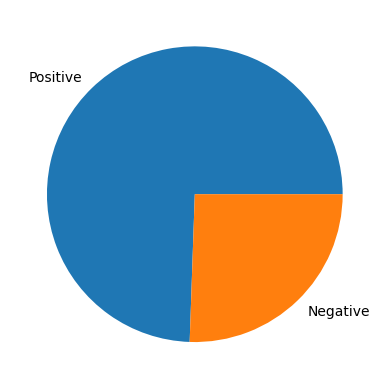

In [61]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle Imbalanced dataset

In [62]:
!pip install imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9434, 1145) (9434,)


In [64]:
y_train_smote.value_counts()

label
0    4717
1    4717
Name: count, dtype: int64

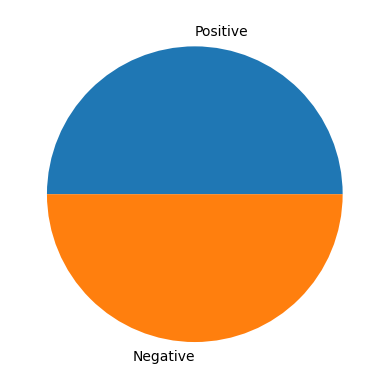

In [65]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [66]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9429    1
9430    1
9431    1
9432    1
9433    1
Name: label, Length: 9434, dtype: int64

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
y_test

23      1
3748    0
5259    1
7040    0
879     0
       ..
7352    0
6926    0
4677    1
7815    1
908     0
Name: label, Length: 1584, dtype: int64

## Model Training & Evaluation

In [70]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score (y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score (y_act, y_pred), 3)
    f1 = round (f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
def validation_scores (y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round (precision_score(y_act, y_pred), 3)
    rec = round(recall_score (y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr} \n\tRecall = {rec}\n\tF1-Score ={f1}')                                        

### Logistic Regression

In [90]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)


y_test_pred = lr.predict(vectorized_x_test)


training_scores(y_train_smote, y_train_pred)


validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.935
	Precision = 0.913
	Recall = 0.963
	F1-Score = 0.937
Testing Scores: 
	Accuracy = 0.884
	Precision = 0.731 
	Recall = 0.87
	F1-Score =0.795


### Naive Bayes

In [91]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)


y_test_pred = mnb.predict(vectorized_x_test)


training_scores(y_train_smote, y_train_pred)


validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.903
	Precision = 0.865
	Recall = 0.955
	F1-Score = 0.908
Testing Scores: 
	Accuracy = 0.892
	Precision = 0.722 
	Recall = 0.943
	F1-Score =0.818


### Decision Tree

In [92]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)


y_test_pred = dt.predict(vectorized_x_test)


training_scores(y_train_smote, y_train_pred)


validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.833
	Precision = 0.676 
	Recall = 0.676
	F1-Score =0.676


## Random Forest

In [93]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)


y_test_pred = rf.predict(vectorized_x_test)


training_scores(y_train_smote, y_train_pred)


validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 0.999
	Recall = 1.0
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.876
	Precision = 0.792 
	Recall = 0.703
	F1-Score =0.745


### Support Vector Machine

In [95]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)


y_test_pred = svm.predict(vectorized_x_test)


training_scores(y_train_smote, y_train_pred)


validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.995
	F1-Score = 0.977
Testing Scores: 
	Accuracy = 0.884
	Precision = 0.749 
	Recall = 0.828
	F1-Score =0.786


In [97]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)